In [1]:
# Importing Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
advertising = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [3]:
# to understand the data 
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
advertising.shape

(200, 5)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
advertising.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Above tables show that there are no NULL values in the dataset.
There are 3 predictors TV,radio,newspaper and target variable is sales.

Now, Our goal is to build a model which predicts sales based on the money spent on different platforms for marketing.

#Data Cleaning


In [7]:
# Checking for Null values

advertising.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There are no NULL values in the dataset.

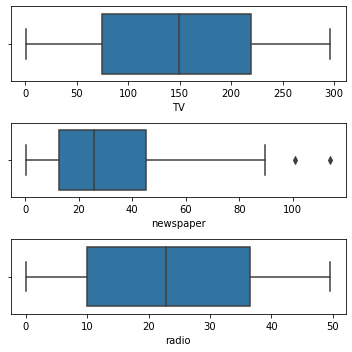

In [8]:
# Checking Outlier 
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['radio'], ax = axs[2])
plt.tight_layout()

Above plots show that there are no significant outliers in the dataset.

Univariate Analysis :

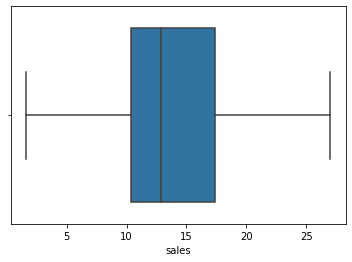

In [9]:
# sales (Target Variable)
sns.boxplot(advertising['sales'])
plt.show()

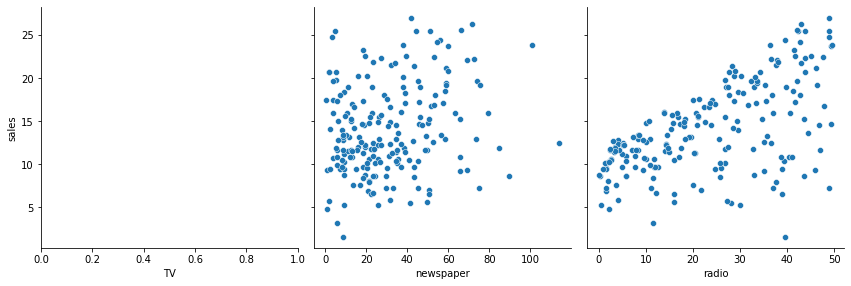

In [12]:
# Let's see how sales related with other variables

sns.pairplot(advertising, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

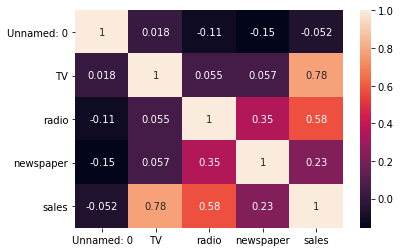

In [13]:
# correlation between different variables-
sns.heatmap(advertising.corr(), annot = True)
plt.show()

In [ ]:
We can see from heatmap and pairplot, the variable TV is most correlated with sales.

So performing simple linear regression using TV as our feature variable and sales as Target Variable

In [14]:
X = advertising['TV']
Y = advertising['sales']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [19]:
Y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

In [20]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(Y_train, X_train_sm).fit()

In [21]:
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [22]:
# Performing a summary operation lists out all the different parameters of the regression line fitted

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Mon, 31 May 2021   Prob (F-statistic):           2.84e-30
Time:                        01:15:28   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

The values we are concerned with are -

1.The coefficients and significance (p-values)
2.R-squared
3.F statistic and its significance

1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816
Means that 81.6% of the variance in sales is explained by TV.This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Means that the model fit is statistically significant, and the explained variance is not purely by chance.

The fit is significant. Let's visualize how well the model fit the data.

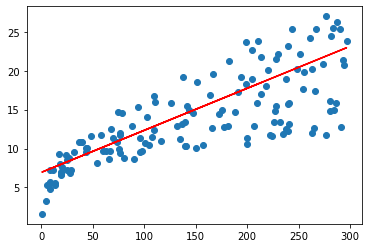

In [23]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

Model Accuracy :

In [24]:
Y_train_pred = lr.predict(X_train_sm)
res = (Y_train - Y_train_pred)

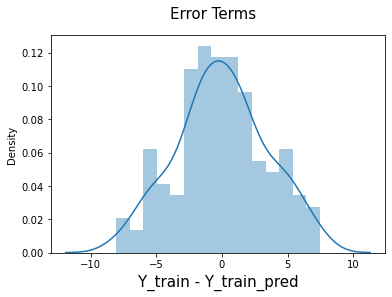

In [25]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                   
plt.xlabel('Y_train - Y_train_pred', fontsize = 15)         
plt.show()

It shows the residuals are following the normally distributed with a mean 0.

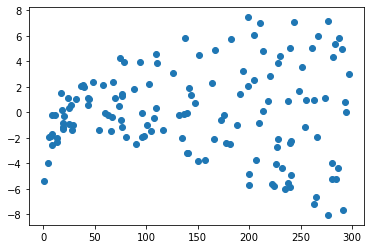

In [26]:
#Looking for patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [27]:
# Predictions on the Test Set
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the Y values corresponding to X_test_sm
Y_pred = lr.predict(X_test_sm)

In [28]:
Y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [29]:
#Looking at the RMSE
#Returns the mean squared error; 
np.sqrt(mean_squared_error(Y_test, Y_pred))

2.8241456288327016

In [30]:
#Checking the R-squared on the test set
r_squared = r2_score(Y_test, Y_pred)
r_squared

0.5942987267783297

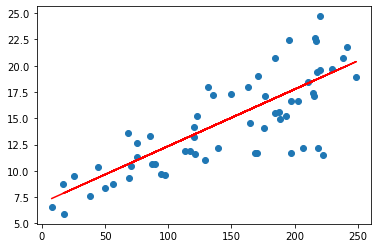

In [31]:
#Visualizing the fit on the test set
plt.scatter(X_test, Y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()